<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/frame_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Function: extract_frames
This function extracts frames from a video at specified intervals.

Key Concepts:

Video Loading (cv2.VideoCapture) – Opens the video for frame extraction.

Frame Iteration (while cap.isOpened()) – Reads frames sequentially.

Frame Extraction (if frame_count % interval == 0) – Captures frames at given intervals.

Memory Management (cap.release()) – Releases video resources after processing.

Usage:
Helps in processing selected frames instead of the entire video.
Useful for video analysis, object detection, or machine learning applications.

In [3]:
def extract_frames(video_path, interval=30):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    extracted_frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % interval == 0:
            extracted_frames.append(frame)

        frame_count += 1

    cap.release()
    return extracted_frames

Function: split_channels
This function separates an image (frame) into its Red, Green, and Blue components.

Key Concepts:

Color Channel Splitting (cv2.split(frame)) – Extracts Blue, Green, and Red channels from a BGR image.

Channel Order (return red, green, blue) – Rearranges the channels to follow the RGB format, as OpenCV loads images in

BGR by default.

Usage:
Essential for color-based image processing.
Helps in analyzing individual color contributions in an image.
Useful for object detection, segmentation, and feature extraction.

In [4]:
def split_channels(frame):
    blue, green, red = cv2.split(frame)
    return red, green, blue

Function: display_frames
This function visualizes extracted frames along with their individual Red, Green, and Blue color channels.

Key Concepts:

Color Conversion (cv2.COLOR_BGR2RGB) – Converts OpenCV's default BGR format to RGB for correct visualization with Matplotlib.

Channel Splitting (split_channels(frame)) – Extracts Red, Green, and Blue components separately.

Matplotlib Subplots (plt.subplots(1, 4)) – Displays the original frame alongside its three color channels.

Colormap Visualization (cmap='Reds', 'Greens', 'Blues') – Uses color maps to enhance each channel's visibility.

Axis Removal (ax.axis('off')) – Hides axes for a cleaner display.


Usage:
Useful for color analysis and preprocessing in computer vision.
Helps in understanding how different color channels contribute to an image.
Beneficial for tasks like image segmentation, object detection, and enhancement.

In [5]:
def display_frames(frames):
    for i, frame in enumerate(frames):
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        red, green, blue = split_channels(frame)

        fig, axes = plt.subplots(1, 4, figsize=(12, 4))

        axes[0].imshow(frame_rgb)
        axes[0].set_title("Original Frame")

        axes[1].imshow(red, cmap='Reds')
        axes[1].set_title("Red Channel")

        axes[2].imshow(green, cmap='Greens')
        axes[2].set_title("Green Channel")

        axes[3].imshow(blue, cmap='Blues')
        axes[3].set_title("Blue Channel")

        for ax in axes:
            ax.axis('off')

        plt.show()

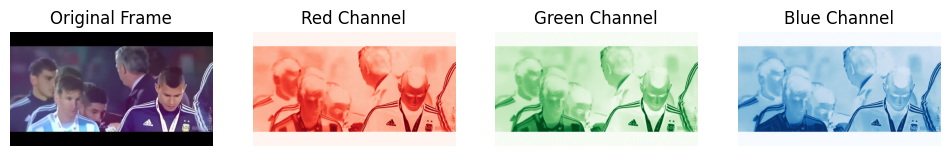

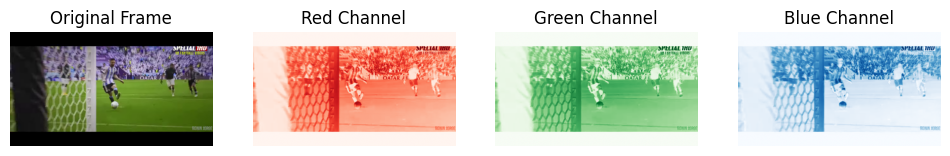

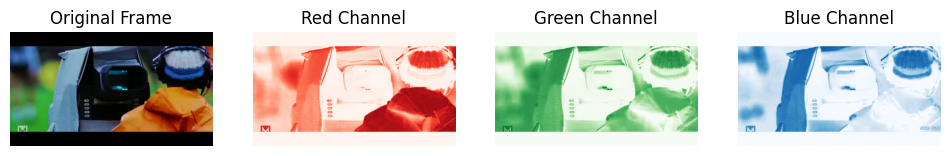

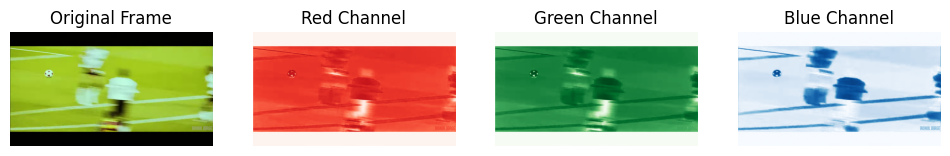

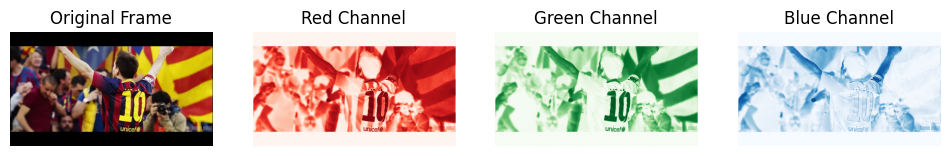

In [13]:
video_path = "/content/Lionel%20Messi%20-%20One%20Chance.mp4"
frames = extract_frames(video_path, interval=300)
display_frames(frames[3:8])